In [2]:
import pandas as pd

# Load the dataset
file_path = 'UNSW_NB15_new.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29786 entries, 0 to 29785
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dur               29786 non-null  float64
 1   proto             29786 non-null  int64  
 2   service           29786 non-null  int64  
 3   state             29786 non-null  int64  
 4   spkts             29786 non-null  int64  
 5   dpkts             29786 non-null  int64  
 6   sbytes            29786 non-null  int64  
 7   dbytes            29786 non-null  int64  
 8   rate              29786 non-null  float64
 9   sttl              29786 non-null  int64  
 10  dttl              29786 non-null  int64  
 11  sload             29786 non-null  float64
 12  dload             29786 non-null  float64
 13  sloss             29786 non-null  int64  
 14  dloss             29786 non-null  int64  
 15  sinpkt            29786 non-null  float64
 16  dinpkt            29786 non-null  float6

(None,
         dur  proto  service  state  spkts  dpkts  sbytes  dbytes       rate  \
 0  1.681642      0        1      1     12     12     628     770  13.677108   
 1  0.393556      0        0      1     10      8     860    1096  43.195886   
 2  0.338017      0        0      1     10      6     998     268  44.376468   
 3  0.964656      0        1      0     14     12     690     950  25.915974   
 4  0.546425      0        0      1     10      8    1168    1040  31.111315   
 
    sttl  ...  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  \
 0    62  ...           1             1           2                 1   
 1    62  ...           3             1           1                 1   
 2   254  ...           6             1           1                 1   
 3    62  ...           1             3           1                 1   
 4   254  ...           6             1           1                 1   
 
    ct_dst_sport_ltm  ct_dst_src_ltm  ct_src_ltm  ct_srv_dst  is_sm_ips

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import joblib

# Load your dataset
data = pd.read_csv('UNSW_NB15_new.csv')

# Select only the desired 18 features
features = ['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 
            'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 
            'dload', 'sloss', 'dloss', 'swin', 'dwin', 'is_sm_ips_ports']  # Update with your actual features
X = data[features]
y = data['label']  # Change this to your target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(class_weight="balanced")
svm_model.fit(X_train_scaled, y_train)



SVC(class_weight='balanced')

In [4]:
# Retrain the SVM model using the test data as the new training set
svm_model_test_data = SVC(kernel='rbf', random_state=42)

# Train the model on the test data
svm_model_test_data.fit(X_test_scaled, y_test)

# Predictions on the new training set (formerly test data)
y_pred_train = svm_model_test_data.predict(X_test_scaled)

# Evaluate the model performance on this set
accuracy_train = accuracy_score(y_test, y_pred_train)
report_train = classification_report(y_test, y_pred_train)

from sklearn.metrics import confusion_matrix
y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_train, report_train


C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


[[   0 2822]
 [   0 3136]]


(0.9394091977173549,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.87      0.93      2822\n           1       0.90      1.00      0.95      3136\n\n    accuracy                           0.94      5958\n   macro avg       0.95      0.94      0.94      5958\nweighted avg       0.95      0.94      0.94      5958\n')

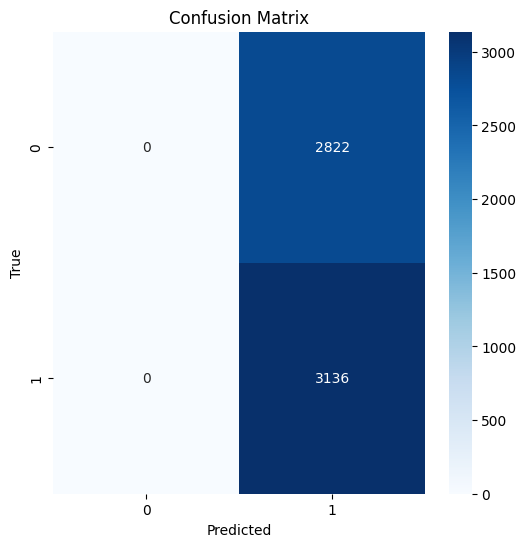

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report, accuracy_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


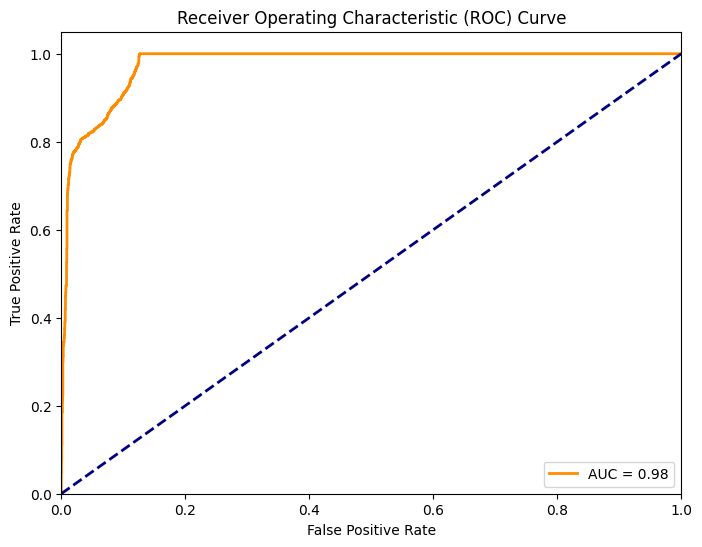

In [6]:
# ROC Curve
y_pred_prob = svm_model.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


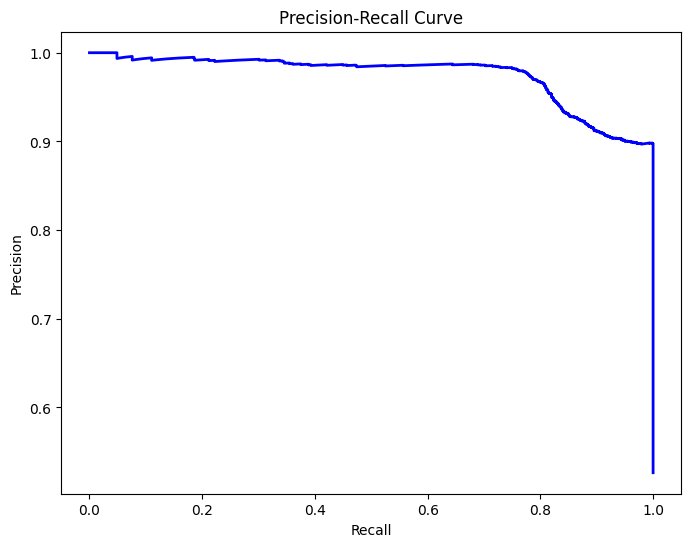

In [7]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [41]:
import joblib

# Save the trained SVM model and the scaler
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']